#### Cargamos librerías y dataframe. Investigamos el dataframe

In [50]:
#Operaciones matemáticas
import pandas as pd
#Librería de visualización de datos:
import matplotlib.pyplot as plt
#Librería de visualización de datos más sencilla y potente basada en matplot
import seaborn as sns
#Para leer .shp files y otras herramientas de visualización de datos
import geopandas as gpd
# Contextily me va a permitir añadir mapas base
#!pip install contextily
import contextily as ctx
#Para gráficos de gradiente
import mapclassify
#Para regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#cargamos el dataframe con la función de pandas read_csv en la variable df
df = pd.read_csv('data/rosario-f.csv')

#mostramos las primeras filas para corrobar que se haya cargado y conocer su estructura
print(df.head())

  interview__key METODO  Coord1__Latitude  Coord1__Longitude     EDAD   \
0    56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1    67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2    24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3    84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4    21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   

       GENERO  INT DE VOTO X ESPACIO      RADIO  
0   Masculino            LIBERTARIOS  820840409  
1   Masculino                  OTROS  820840410  
2    Femenino                  OTROS  820840502  
3   Masculino            LIBERTARIOS  820840502  
4    Femenino         NINGUNO/NOSABE  820841013  


In [5]:
#Conocemos cómo están escritas exactamente cada columna
print(df.columns)

Index(['interview__key', 'METODO', 'Coord1__Latitude', 'Coord1__Longitude',
       ' EDAD ', ' GENERO ', 'INT DE VOTO X ESPACIO', 'RADIO'],
      dtype='object')


In [6]:
#Conocemos los valores únicos de variables de interés
columnas = ['METODO', ' EDAD ', ' GENERO ', 'INT DE VOTO X ESPACIO']
for columna in columnas:
    valores_unicos = df[columna].unique()
    print(f"Valores únicos en {columna}: {valores_unicos}")

Valores únicos en METODO: ['F2F' 'IVR']
Valores únicos en  EDAD : ['56 y mas' '36 a 45' '26 a 35' '46 a 55' '16 a 25']
Valores únicos en  GENERO : [' Masculino ' ' Femenino ' ' Otro ']
Valores únicos en INT DE VOTO X ESPACIO: ['LIBERTARIOS' 'OTROS' 'NINGUNO/NOSABE' 'JxC' 'FdT' 'PNK' 'FIT']


#### Información de la muestra

In [7]:
#Conocemos la cantidad de casos
print(len(df))

372


In [8]:
#investigamos si tenemos una cantidad de respuestas relevantes por radio censal para agruparlas
len(df['RADIO'].unique())

232

In [ ]:
#hay 232 radios censales para 372, no sirve agrupar por radio censal

METODO
IVR    271
F2F    101
Name: count, dtype: int64


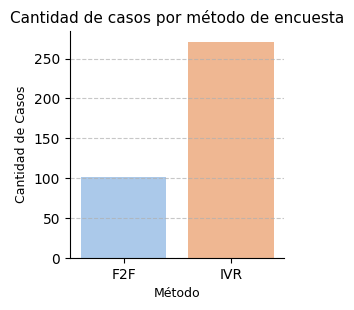

In [9]:
#Conocemos la cantidad de casos según el método realizado con el método de pandas value_count
print((df['METODO'].value_counts()))

#Creamos un gráfico de barras con seaborn. Declaramos la variable independiente (método de encuesta), el tipo de gráfico (count), la fuente de datos,
#la paleta y el tamaño
sns.catplot(x='METODO', hue='METODO', kind='count', data=df, palette='pastel', height=3)

#Títulos
plt.title('Cantidad de casos por método de encuesta', fontsize=11)
plt.xlabel('Método', fontsize=9)
plt.ylabel('Cantidad de Casos', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 EDAD 
56 y mas    101
36 a 45      99
46 a 55      83
26 a 35      61
16 a 25      28
Name: count, dtype: int64


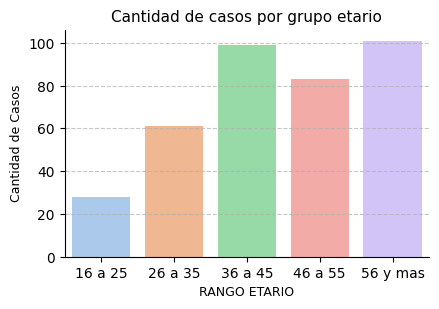

In [10]:
#Conocemos la cantidad de casos según grupo etario
print((df[' EDAD '].value_counts()))

#Creamos un gráfico de barras para saber cantidades por grupo etario. El df de base está ordenado alfabeticamente por la variable Edad
sns.catplot(x=' EDAD ', hue=' EDAD ', kind='count', data=df.sort_values(' EDAD '), palette='pastel', height=3, aspect=1.5)

#Títulos
plt.title('Cantidad de casos por grupo etario', fontsize=11)
plt.xlabel('RANGO ETARIO', fontsize=9)
plt.ylabel('Cantidad de Casos', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 GENERO 
Masculino     198
Femenino      165
Otro            9
Name: count, dtype: int64


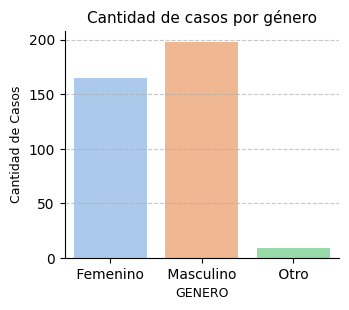

In [11]:
#Conocemos la cantidad de casos según género
print((df[' GENERO '].value_counts()))

#Creamos un gráfico de barras para saber cantidades por grupo etario. El df de base está ordenado alfabeticamente por la variable Edad
sns.catplot(x=' GENERO ', hue=' GENERO ', kind='count', data=df.sort_values(' GENERO '), palette='pastel', height=3, aspect=1.2)

#Títulos
plt.title('Cantidad de casos por género', fontsize=11)
plt.xlabel('GENERO', fontsize=9)
plt.ylabel('Cantidad de Casos', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Resultados electorales

INT DE VOTO X ESPACIO
JxC               90
FdT               80
NINGUNO/NOSABE    72
LIBERTARIOS       57
OTROS             35
PNK               26
FIT               12
Name: count, dtype: int64


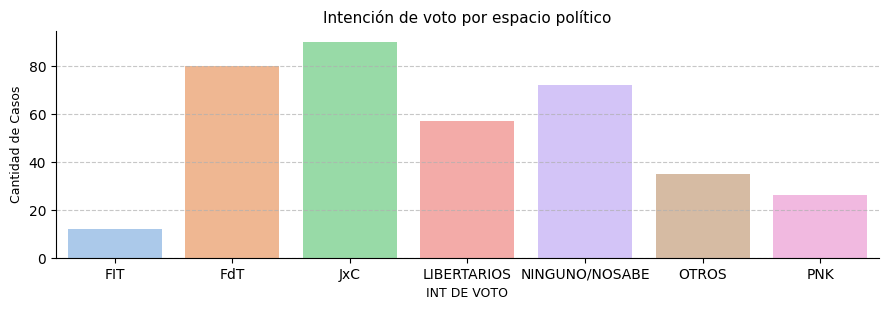

In [12]:
#Conocemos la cantidad de casos según intención de voto
print((df['INT DE VOTO X ESPACIO'].value_counts()))

#Gráfico de barras de intención de votos por espacio político. Las categorías están ordenadas alfabéticamente
sns.catplot(x='INT DE VOTO X ESPACIO', hue='INT DE VOTO X ESPACIO', kind='count', data=df.sort_values('INT DE VOTO X ESPACIO'), palette='pastel', height=3, aspect=3)

#Títulos
plt.title('Intención de voto por espacio político', fontsize=11)
plt.xlabel('INT DE VOTO', fontsize=9)
plt.ylabel('Cantidad de Casos', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

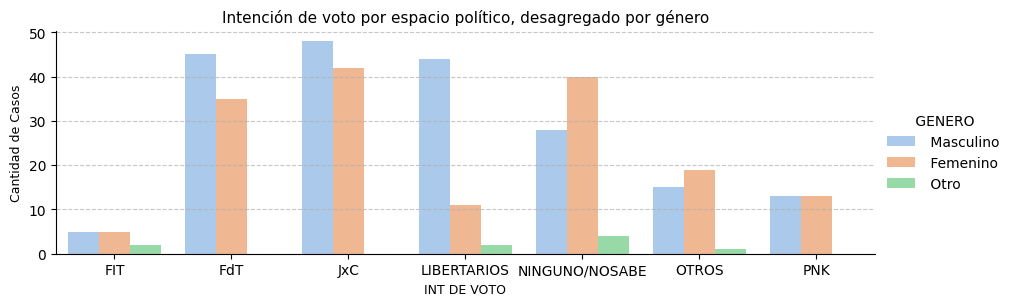

In [13]:
#Gráfico de barras de intención de votos desagregado por género. Las categorías están ordenadas alfabéticamente
sns.catplot(x='INT DE VOTO X ESPACIO', hue=' GENERO ', kind='count', data=df.sort_values('INT DE VOTO X ESPACIO'), palette='pastel', height=3, aspect=3)

#Títulos
plt.title('Intención de voto por espacio político, desagregado por género', fontsize=11)
plt.xlabel('INT DE VOTO', fontsize=9)
plt.ylabel('Cantidad de Casos', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

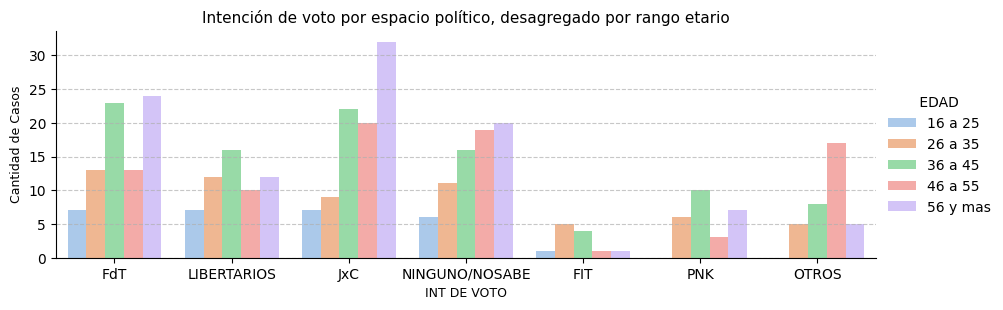

In [14]:
#Gráfico de barras de intención de votos desagregado por edad. Las categorías están ordenadas alfabéticamente
sns.catplot(x='INT DE VOTO X ESPACIO', hue=' EDAD ', kind='count', data=df.sort_values(' EDAD '), palette='pastel', height=3, aspect=3)

#Títulos
plt.title('Intención de voto por espacio político, desagregado por rango etario', fontsize=11)
plt.xlabel('INT DE VOTO', fontsize=9)
plt.ylabel('Cantidad de Casos', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

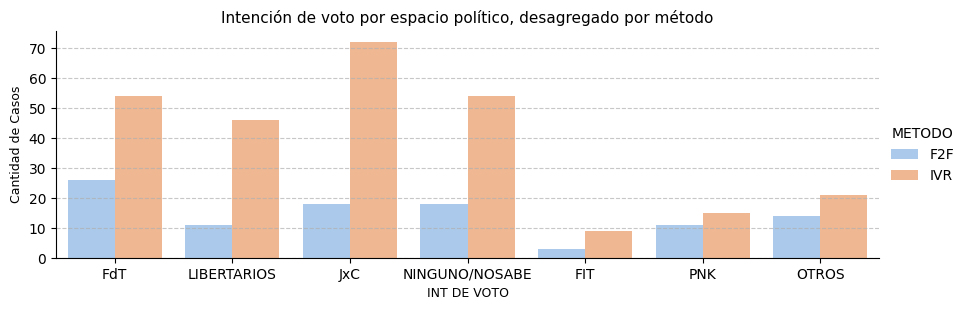

In [15]:
#Gráfico de barras de intención de votos desagregado por método. Las categorías están ordenadas alfabéticamente
sns.catplot(x='INT DE VOTO X ESPACIO', hue='METODO', kind='count', data=df.sort_values(' EDAD '), palette='pastel', height=3, aspect=3)

#Títulos
plt.title('Intención de voto por espacio político, desagregado por método', fontsize=11)
plt.xlabel('INT DE VOTO', fontsize=9)
plt.ylabel('Cantidad de Casos', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Evaluación geográfica

Index(['CODIGO', 'NOMBRE', 'IDPROV', 'PROV', 'IDDPTO', 'DPTO', 'SUPERFICIE',
       'LATITUD_CE', 'LONGITUD_C', 'geometry'],
      dtype='object')
EPSG:4326
EPSG:4326


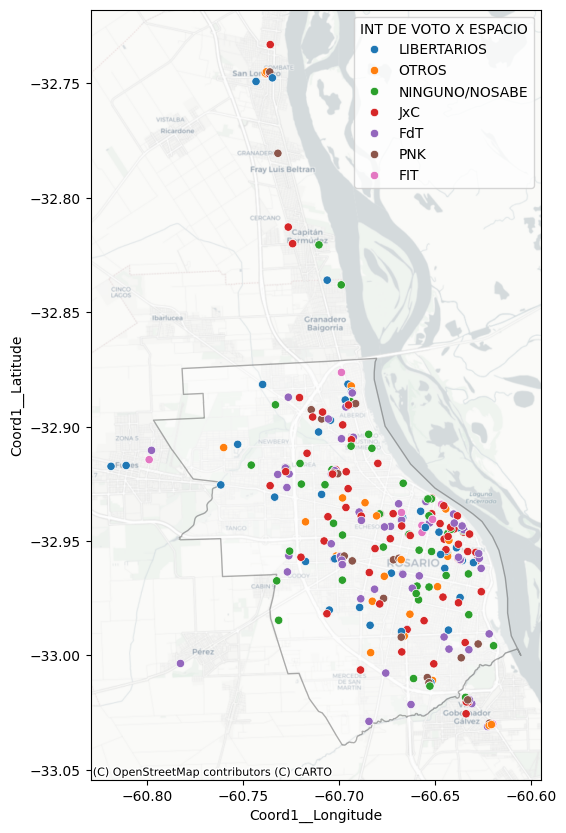

In [18]:
#Importamos e investigamos mapas de base (no usaremos todos)
rosario_barrios = gpd.read_file("data/rosario-barrios/rosario-barrios.shp")
rosario_dpto = gpd.read_file("data/dpto-rosario/dpto-rosario.shp")
rosario_muni = gpd.read_file("data/municipio-rosario/municipios-rosario.shp")
print(rosario_barrios.columns)

#verificamos sistemas de coordenadas
print(rosario_barrios.crs)
print(rosario_dpto.crs)

#Al previsualizar los datos descubrimos que había dos puntos erróneos, cuyo valor de latitud/longitud era lejano a rosario
#Lo eliminamos del df creando df_2
df_2 = df[df['Coord1__Longitude'] <= -60.5]

#Creamos mapa con base + municipio de rosario + puntos de rpta de encuesta según intención de voto
fig, ax = plt.subplots(figsize=(10, 10))  # Defino tamaño de gráfico base
rosario_muni.plot(ax=ax, edgecolor='black', color='white', alpha=0.3)
sns.scatterplot(x='Coord1__Longitude' , y='Coord1__Latitude' ,  hue ='INT DE VOTO X ESPACIO', data= df_2)
ctx.add_basemap(ax, crs=rosario_barrios.crs.to_string(), source=ctx.providers.CartoDB.Positron)




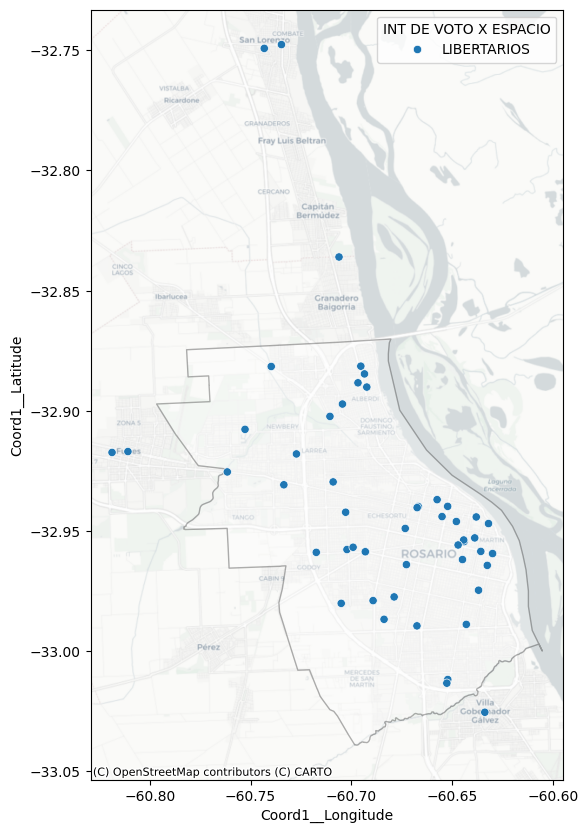

In [19]:
#Creamos mapa de intención de voto libertario 
#Estructura: base + municipio de rosario + puntos de rpta de encuesta según intención de voto
fig, ax = plt.subplots(figsize=(10, 10))  # Defino tamaño de gráfico base
rosario_muni.plot(ax=ax, edgecolor='black', color='white', alpha=0.3)
sns.scatterplot(x='Coord1__Longitude' , y='Coord1__Latitude' ,  hue ='INT DE VOTO X ESPACIO', data= df_2[df_2['INT DE VOTO X ESPACIO'] == 'LIBERTARIOS'])
ctx.add_basemap(ax, crs=rosario_barrios.crs.to_string(), source=ctx.providers.CartoDB.Positron)

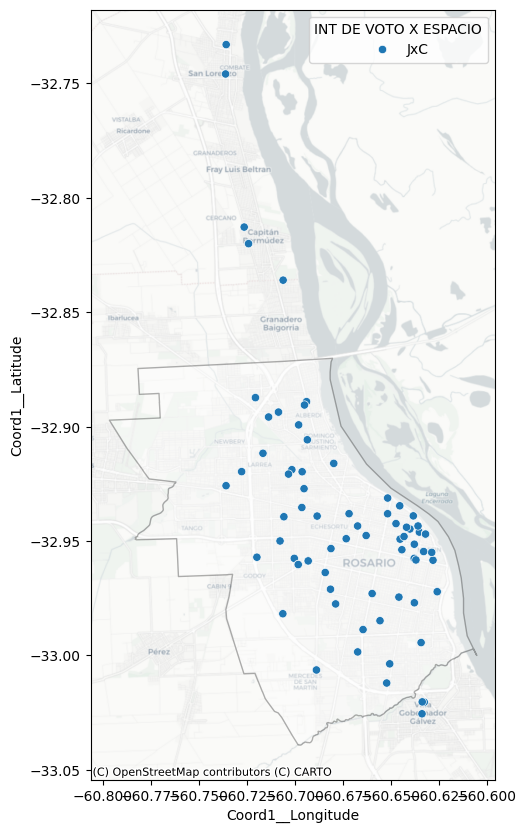

In [20]:
#Creamos mapa de intención de voto JxC
#Estructura: base + municipio de rosario + puntos de rpta de encuesta según intención de voto
fig, ax = plt.subplots(figsize=(10, 10))  # Defino tamaño de gráfico base
rosario_muni.plot(ax=ax, edgecolor='black', color='white', alpha=0.3)
sns.scatterplot(x='Coord1__Longitude' , y='Coord1__Latitude' ,  hue ='INT DE VOTO X ESPACIO', data= df_2[df_2['INT DE VOTO X ESPACIO'] == 'JxC'])
ctx.add_basemap(ax, crs=rosario_barrios.crs.to_string(), source=ctx.providers.CartoDB.Positron)

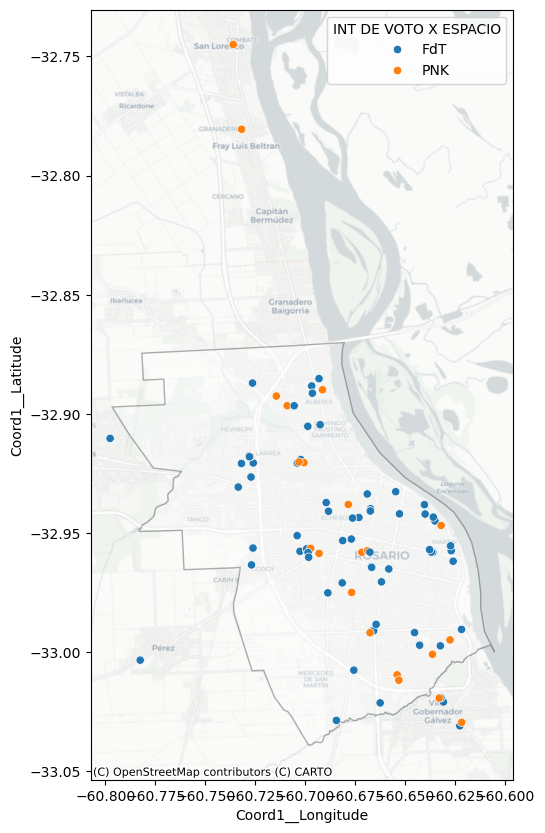

In [357]:
#Creamos mapa de intención de voto Peronista
#Estructura: base + municipio de rosario + puntos de rpta de encuesta según intención de voto
fig, ax = plt.subplots(figsize=(10, 10))  # Defino tamaño de gráfico base
rosario_muni.plot(ax=ax, edgecolor='black', color='white', alpha=0.3)
sns.scatterplot(x='Coord1__Longitude' , y='Coord1__Latitude' ,  hue ='INT DE VOTO X ESPACIO', data= df_2[(df_2['INT DE VOTO X ESPACIO'] == 'FdT') | (df_2['INT DE VOTO X ESPACIO'] == 'PNK')])
ctx.add_basemap(ax, crs=rosario_barrios.crs.to_string(), source=ctx.providers.CartoDB.Positron)

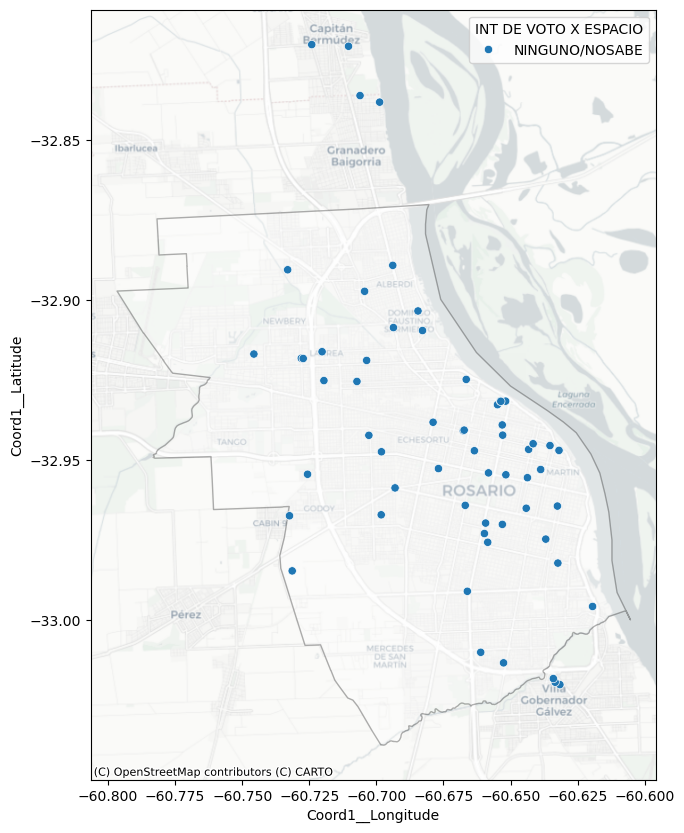

In [395]:
#Creamos mapa de intención de voto libertario 
#Estructura: base + municipio de rosario + puntos de rpta de encuesta según intención de voto
fig, ax = plt.subplots(figsize=(10, 10))  # Defino tamaño de gráfico base
rosario_muni.plot(ax=ax, edgecolor='black', color='white', alpha=0.3)
sns.scatterplot(x='Coord1__Longitude' , y='Coord1__Latitude' ,  hue ='INT DE VOTO X ESPACIO', data= df_2[df_2['INT DE VOTO X ESPACIO'] == 'NINGUNO/NOSABE'])
ctx.add_basemap(ax, crs=rosario_barrios.crs.to_string(), source=ctx.providers.CartoDB.Positron)

#### Indicadores educativos

In [36]:
#Importamos data set con indicadores educativos e investigamos
ind_edu = gpd.read_file("data/gran-rosario-edu/gran-rosario-edu.shp")
print(ind_edu.head())
print(ind_edu.columns.tolist())

     REDCODE  P_TOTAL  P_A17  P_0A3  P_4A5  P_6A12  P_13A17  P_18A  P_18A29  \
0  820840216    682.0  182.0   35.0   17.0    78.0     52.0  500.0    113.0   
1  820840218   1232.0  373.0   71.0   39.0   153.0    110.0  859.0    258.0   
2  820840221   1017.0  248.0   37.0   28.0    97.0     86.0  769.0    200.0   
3  820840222    794.0  198.0   45.0   13.0    79.0     61.0  596.0    144.0   
4  820840301    805.0  304.0   65.0   45.0   127.0     67.0  501.0    170.0   

   P_30A54  ...  CODDPTO     DPTO  REDCODE_1  RADIO  RADIOS_POB  RADIOS_HOG  \
0    218.0  ...    82084  Rosario  820840216   None         682         224   
1    432.0  ...    82084  Rosario  820840218   None        1232         365   
2    361.0  ...    82084  Rosario  820840221   None        1017         352   
3    290.0  ...    82084  Rosario  820840222   None         794         271   
4    263.0  ...    82084  Rosario  820840301   None         805         267   

   RADIOS_LAT  RADIOS_LON  RADIOS_SUP  \
0  -32.83

In [37]:
#Creamos columna con % de solo primaria completa
ind_edu['solo-p'] = ind_edu['P18A_SOLOP'] / ind_edu['P_18A']
print(ind_edu['solo-p'])

0       0.474000
1       0.454016
2       0.322497
3       0.307047
4       0.453094
          ...   
1953    0.153846
1954    0.440678
1955    0.207407
1956    0.243711
1957    0.154195
Name: solo-p, Length: 1958, dtype: float64


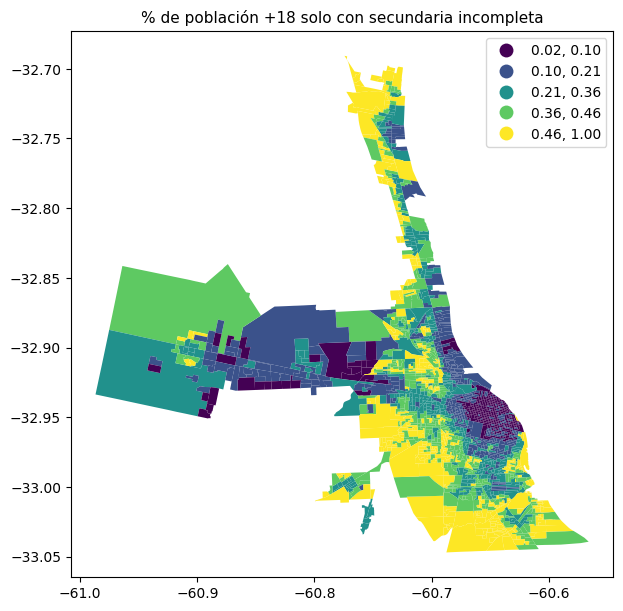

In [84]:
#Gráfico
ind_edu.plot(column='solo-p', scheme='quantiles', figsize=(7, 10), legend=True)

#Títulos
plt.title('% de población +18 solo con secundaria incompleta', fontsize=11)
plt.show()

#### Hogares con NBI

In [32]:
#Cargamos .shp file
nbi = gpd.read_file("data/gran-rosario-nbi/gran-rosario-nbi.shp")
print(nbi.head())
print(nbi.columns.tolist())

     REDCODE  H_TOTAL  H_NBI  H_COMPUTAD  H_DOMESTIC  H_HACINAMI  H_HACINA_1  \
0  820840216    224.0    8.0        90.0         1.0          16         4.0   
1  820840218    365.0   28.0       158.0         0.0          31        10.0   
2  820840221    352.0   21.0       226.0         0.0          21         7.0   
3  820840222    271.0   15.0       176.0         0.0          17         6.0   
4  820840301    267.0   52.0        65.0         0.0          56        28.0   

   H_CADENA  H_AGUA_RED  H_AGUA_VIV  ...  CODDPTO     DPTO  REDCODE_1  RADIO  \
0      16.0           7          16  ...    82084  Rosario  820840216   None   
1      74.0           4          74  ...    82084  Rosario  820840218   None   
2      14.0           5          14  ...    82084  Rosario  820840221   None   
3      16.0           7          16  ...    82084  Rosario  820840222   None   
4     169.0         155         169  ...    82084  Rosario  820840301   None   

   RADIOS_POB  RADIOS_HOG  RADIOS_LAT 

In [33]:
#Creamos columna de % con NBI
nbi['con-nbi'] = nbi['H_NBI'] / nbi['H_TOTAL']
print(nbi['con-nbi'])

0       0.035714
1       0.076712
2       0.059659
3       0.055351
4       0.194757
          ...   
1953    0.009709
1954    0.162500
1955    0.009772
1956    0.091837
1957    0.025000
Name: con-nbi, Length: 1958, dtype: float64


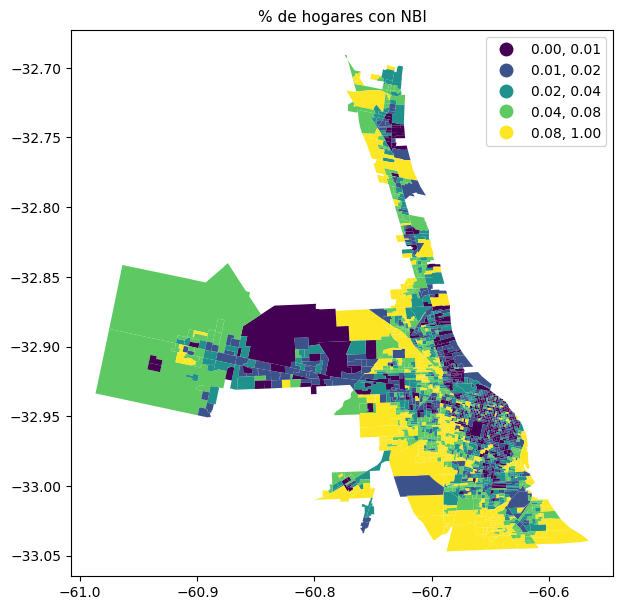

In [34]:
#Gráfico
nbi.plot(column='con-nbi', scheme='quantiles', figsize=(7, 10), legend=True)

#Títulos
plt.title('% de hogares con NBI', fontsize=11)
plt.show()

#### Regresión logística entre NBI e INT DE VOTO

In [31]:
#Creamos df3 donde solo tendremos, del df2, radio censal (para el joint con NBI) e INT DE VOTO
df_3 = df_2[['RADIO', 'INT DE VOTO X ESPACIO']]
print(df_3)

         RADIO INT DE VOTO X ESPACIO
0    820840409           LIBERTARIOS
1    820840410                 OTROS
2    820840502                 OTROS
3    820840502           LIBERTARIOS
4    820841013        NINGUNO/NOSABE
..         ...                   ...
367  821190304                   FdT
368  821190305        NINGUNO/NOSABE
369  820843707           LIBERTARIOS
370  820280512                   FdT
371  820842113                   FdT

[369 rows x 2 columns]


In [40]:
#Creamos df4, donde del .shp de NBI nos quedaremos con RADIO CENSAL y la columna de % de NBI
df_4 = nbi[['REDCODE', 'con-nbi']]
print(df_4)

        REDCODE   con-nbi
0     820840216  0.035714
1     820840218  0.076712
2     820840221  0.059659
3     820840222  0.055351
4     820840301  0.194757
...         ...       ...
1953  821191018  0.009709
1954  821190301  0.162500
1955  820840207  0.009772
1956  820840220  0.091837
1957  820840219  0.025000

[1958 rows x 2 columns]


In [65]:
#Copio df_4 para cambiar el tipo de dato de la columna REDCODE
df_4_copy = df_4.copy()
df_4_copy['REDCODE'] = df_4['REDCODE'].astype('int64')

#Creamos df5 con inner join entre df3 (respuestas con radio) y df4 (nbi con radio), usando la variable RADIO como común
df_5 = pd.merge(df_4, df_3, left_on="REDCODE", right_on="RADIO", how="inner")
print(df_5)

       REDCODE   con-nbi      RADIO INT DE VOTO X ESPACIO
0    820840305  0.053498  820840305                   JxC
1    820840307  0.004975  820840307           LIBERTARIOS
2    820840307  0.004975  820840307                   JxC
3    820840311  0.175141  820840311                   PNK
4    820842002  0.020833  820842002                   FdT
..         ...       ...        ...                   ...
353  821191003  0.006431  821191003                 OTROS
354  821191003  0.006431  821191003                 OTROS
355  821191003  0.006431  821191003                   JxC
356  821191003  0.006431  821191003                   PNK
357  821191008  0.024242  821191008           LIBERTARIOS

[358 rows x 4 columns]


In [66]:
#Creamos variables indicadoras para 'INT DE VOTO X ESPACIO'
df_5 = pd.get_dummies(df_5, columns=['INT DE VOTO X ESPACIO'], drop_first=True)
print(df_5.columns)

Index(['REDCODE', 'con-nbi', 'RADIO', 'INT DE VOTO X ESPACIO_FdT',
       'INT DE VOTO X ESPACIO_JxC', 'INT DE VOTO X ESPACIO_LIBERTARIOS',
       'INT DE VOTO X ESPACIO_NINGUNO/NOSABE', 'INT DE VOTO X ESPACIO_OTROS',
       'INT DE VOTO X ESPACIO_PNK'],
      dtype='object')


In [67]:
#Definimos la variable independiente (con-nbi) y las dependientes
X = df_5[['con-nbi']]  # Variable independiente

#Listamos las columnas de los espacios políticos
espacios_politicos = ['INT DE VOTO X ESPACIO_LIBERTARIOS', 
                      'INT DE VOTO X ESPACIO_OTROS', 
                      'INT DE VOTO X ESPACIO_NINGUNO/NOSABE', 
                      'INT DE VOTO X ESPACIO_JxC', 
                      'INT DE VOTO X ESPACIO_FdT', 
                      'INT DE VOTO X ESPACIO_PNK']

#Creamos un modelo de regresión logística para cada espacio político
for espacio in espacios_politicos:
    # Definir la variable dependiente (una por cada espacio político)
    y = df_5[espacio]
    
    # Divimos el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Ajustamos el modelo
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    #Realizamos predicciones
    y_pred = model.predict(X_test)
    
    #Mostramos resultados
    print(f"Regresión para: {espacio}")
    print(classification_report(y_test, y_pred))
    print('-' * 50)

Regresión para: INT DE VOTO X ESPACIO_LIBERTARIOS
              precision    recall  f1-score   support

       False       0.86      1.00      0.93        93
        True       0.00      0.00      0.00        15

    accuracy                           0.86       108
   macro avg       0.43      0.50      0.46       108
weighted avg       0.74      0.86      0.80       108

--------------------------------------------------
Regresión para: INT DE VOTO X ESPACIO_OTROS
              precision    recall  f1-score   support

       False       0.89      1.00      0.94        96
        True       0.00      0.00      0.00        12

    accuracy                           0.89       108
   macro avg       0.44      0.50      0.47       108
weighted avg       0.79      0.89      0.84       108

--------------------------------------------------
Regresión para: INT DE VOTO X ESPACIO_NINGUNO/NOSABE
              precision    recall  f1-score   support

       False       0.80      1.00      0.8

C:\Users\Francisco\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\mi_ent

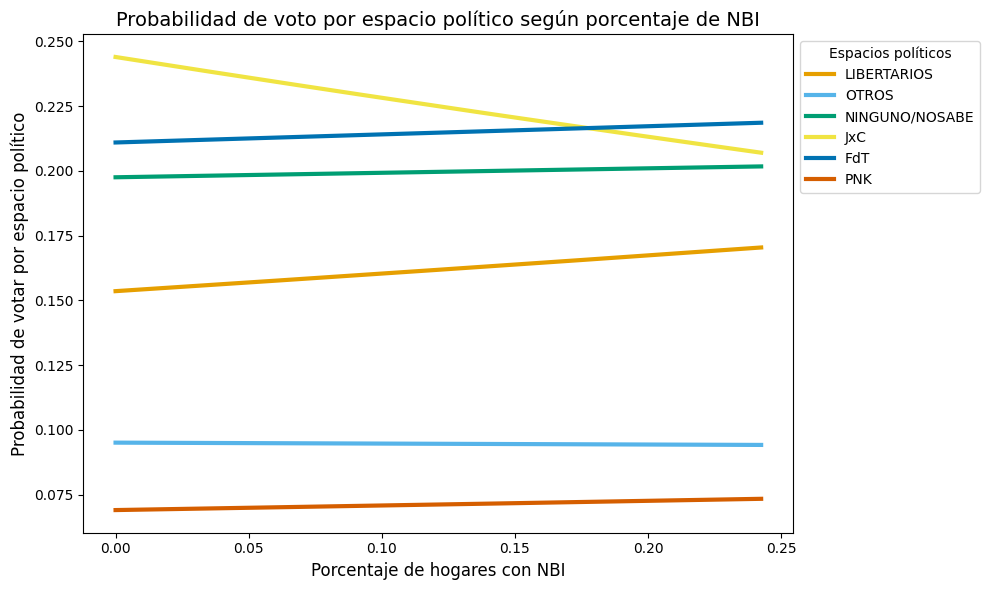

In [77]:
# Lista de las columnas de los diferentes espacios políticos
espacios_politicos = [
    'INT DE VOTO X ESPACIO_LIBERTARIOS',
    'INT DE VOTO X ESPACIO_OTROS',
    'INT DE VOTO X ESPACIO_NINGUNO/NOSABE',
    'INT DE VOTO X ESPACIO_JxC',
    'INT DE VOTO X ESPACIO_FdT',
    'INT DE VOTO X ESPACIO_PNK'
]

# Paleta de colores daltónicos-friendly
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7']

# Asegúrate de que los datos estén ordenados según la variable independiente (NBI)
df_5_sorted = df_5.sort_values('con-nbi')

# Crear un gráfico vacío
plt.figure(figsize=(10, 6))

# Para cada espacio político, ajustamos el modelo y graficamos la probabilidad
for espacio, color in zip(espacios_politicos, colors):
    # Variable dependiente (intención de voto para cada espacio político)
    y = df_5_sorted[espacio]
    
    # Ajustar el modelo de regresión logística para este espacio político
    model = LogisticRegression()
    model.fit(df_5_sorted[['con-nbi']], y)
    
    # Obtener las probabilidades predichas para la clase 'True' (voto por el espacio político)
    probs = model.predict_proba(df_5_sorted[['con-nbi']])[:, 1]
    
    # Graficar la probabilidad de voto para este espacio político con una línea más gruesa
    plt.plot(df_5_sorted['con-nbi'], probs, label=espacio.replace('INT DE VOTO X ESPACIO_', ''), 
             linewidth=3, color=color)

# Etiquetas y título
plt.xlabel('Porcentaje de hogares con NBI', fontsize=12)
plt.ylabel('Probabilidad de votar por espacio político', fontsize=12)
plt.title('Probabilidad de voto por espacio político según porcentaje de NBI', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title='Espacios políticos')

# Mostrar el gráfico con un diseño más ajustado
plt.tight_layout()
plt.show()

#### Regresión logística entre % de secundaria incompleta e INT DE VOTO

In [78]:
df_6 = ind_edu[['REDCODE', 'solo-p']]
print(df_6)

        REDCODE    solo-p
0     820840216  0.474000
1     820840218  0.454016
2     820840221  0.322497
3     820840222  0.307047
4     820840301  0.453094
...         ...       ...
1953  821191018  0.153846
1954  821190301  0.440678
1955  820840207  0.207407
1956  820840220  0.243711
1957  820840219  0.154195

[1958 rows x 2 columns]


In [79]:
#Copio df_6 para cambiar el tipo de dato de la columna REDCODE
df_6_copy = df_6.copy()
df_6_copy['REDCODE'] = df_6['REDCODE'].astype('int64')

#Creamos df7 con inner join entre df3 (respuestas con radio) y df6 (indic edu con radio), usando la variable RADIO como común
df_7 = pd.merge(df_6_copy, df_3, left_on="REDCODE", right_on="RADIO", how="inner")
print(df_7)

       REDCODE    solo-p      RADIO INT DE VOTO X ESPACIO
0    820840305  0.384462  820840305                   JxC
1    820840307  0.092077  820840307           LIBERTARIOS
2    820840307  0.092077  820840307                   JxC
3    820840311  0.485557  820840311                   PNK
4    820842002  0.061475  820842002                   FdT
..         ...       ...        ...                   ...
353  821191003  0.187266  821191003                 OTROS
354  821191003  0.187266  821191003                 OTROS
355  821191003  0.187266  821191003                   JxC
356  821191003  0.187266  821191003                   PNK
357  821191008  0.207641  821191008           LIBERTARIOS

[358 rows x 4 columns]


In [80]:
#Creamos variables indicadoras para 'INT DE VOTO X ESPACIO'
df_8 = pd.get_dummies(df_7, columns=['INT DE VOTO X ESPACIO'], drop_first=True)
print(df_8.columns)

Index(['REDCODE', 'solo-p', 'RADIO', 'INT DE VOTO X ESPACIO_FdT',
       'INT DE VOTO X ESPACIO_JxC', 'INT DE VOTO X ESPACIO_LIBERTARIOS',
       'INT DE VOTO X ESPACIO_NINGUNO/NOSABE', 'INT DE VOTO X ESPACIO_OTROS',
       'INT DE VOTO X ESPACIO_PNK'],
      dtype='object')


In [82]:
#Definimos la variable independiente (solo-p) y las dependientes
X = df_8[['solo-p']]  # Variable independiente

#Listamos las columnas de los espacios políticos
espacios_politicos = ['INT DE VOTO X ESPACIO_LIBERTARIOS', 
                      'INT DE VOTO X ESPACIO_OTROS', 
                      'INT DE VOTO X ESPACIO_NINGUNO/NOSABE', 
                      'INT DE VOTO X ESPACIO_JxC', 
                      'INT DE VOTO X ESPACIO_FdT', 
                      'INT DE VOTO X ESPACIO_PNK']

#Creamos un modelo de regresión logística para cada espacio político
for espacio in espacios_politicos:
    # Definir la variable dependiente (una por cada espacio político)
    y = df_8[espacio]
    
    # Divimos el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Ajustamos el modelo
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    #Realizamos predicciones
    y_pred = model.predict(X_test)
    
    #Mostramos resultados
    print(f"Regresión para: {espacio}")
    print(classification_report(y_test, y_pred))
    print('-' * 50)

Regresión para: INT DE VOTO X ESPACIO_LIBERTARIOS
              precision    recall  f1-score   support

       False       0.86      1.00      0.93        93
        True       0.00      0.00      0.00        15

    accuracy                           0.86       108
   macro avg       0.43      0.50      0.46       108
weighted avg       0.74      0.86      0.80       108

--------------------------------------------------
Regresión para: INT DE VOTO X ESPACIO_OTROS
              precision    recall  f1-score   support

       False       0.89      1.00      0.94        96
        True       0.00      0.00      0.00        12

    accuracy                           0.89       108
   macro avg       0.44      0.50      0.47       108
weighted avg       0.79      0.89      0.84       108

--------------------------------------------------
Regresión para: INT DE VOTO X ESPACIO_NINGUNO/NOSABE
              precision    recall  f1-score   support

       False       0.80      1.00      0.8

C:\Users\Francisco\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\mi_entorno\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\mi_ent

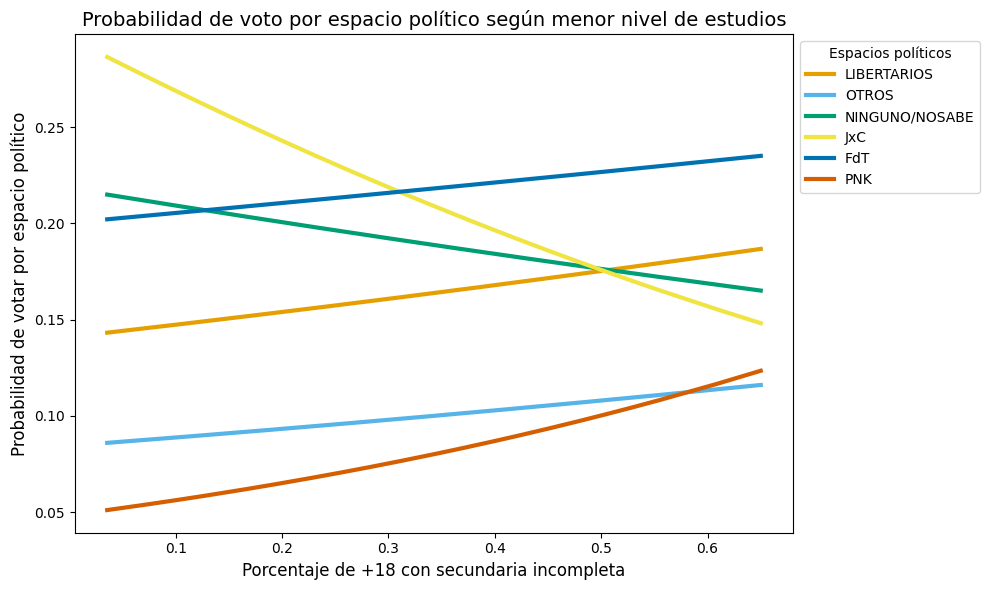

In [83]:
# Lista de las columnas de los diferentes espacios políticos
espacios_politicos = [
    'INT DE VOTO X ESPACIO_LIBERTARIOS',
    'INT DE VOTO X ESPACIO_OTROS',
    'INT DE VOTO X ESPACIO_NINGUNO/NOSABE',
    'INT DE VOTO X ESPACIO_JxC',
    'INT DE VOTO X ESPACIO_FdT',
    'INT DE VOTO X ESPACIO_PNK'
]

# Paleta de colores daltónicos-friendly
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7']

# Asegúrate de que los datos estén ordenados según la variable independiente (NBI)
df_8_sorted = df_8.sort_values('solo-p')

# Crear un gráfico vacío
plt.figure(figsize=(10, 6))

# Para cada espacio político, ajustamos el modelo y graficamos la probabilidad
for espacio, color in zip(espacios_politicos, colors):
    # Variable dependiente (intención de voto para cada espacio político)
    y = df_8_sorted[espacio]
    
    # Ajustar el modelo de regresión logística para este espacio político
    model = LogisticRegression()
    model.fit(df_8_sorted[['solo-p']], y)
    
    # Obtener las probabilidades predichas para la clase 'True' (voto por el espacio político)
    probs = model.predict_proba(df_8_sorted[['solo-p']])[:, 1]
    
    # Graficar la probabilidad de voto para este espacio político con una línea más gruesa
    plt.plot(df_8_sorted['solo-p'], probs, label=espacio.replace('INT DE VOTO X ESPACIO_', ''), 
             linewidth=3, color=color)

# Etiquetas y título
plt.xlabel('Porcentaje de +18 con secundaria incompleta', fontsize=12)
plt.ylabel('Probabilidad de votar por espacio político', fontsize=12)
plt.title('Probabilidad de voto por espacio político según menor nivel de estudios', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title='Espacios políticos')

# Mostrar el gráfico con un diseño más ajustado
plt.tight_layout()
plt.show()